<h1>K-Means Clustering</h1>

This is an example to how use K-Means Clustering in Python. 
In this example, was employed the Iris Dataset (multiclass).
The example is based in the content from the link bellow. 
Reading these articles is important to understand how the algorithm works.

- https://heartbeat.fritz.ai/k-means-clustering-using-sklearn-and-python-4a054d67b187
- https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203
- https://www.kaggle.com/tonzowonzo/simple-k-means-clustering-on-the-iris-dataset
- https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/
- https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb

<h5>Importing Packages</h5>

In [34]:
import numpy as np
from scipy.stats import mode
from tabulate import tabulate
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

<h5>Importing Dataset</h5>

In [2]:
# Load iris dataset from sklearn
iris = datasets.load_iris()

# Input values
x = iris['data']

# Output values
y = iris['target']

# Train (80%) and test (20%) values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

<h5>Processing</h5>

Elbow Method - Optimal Number of Clusters

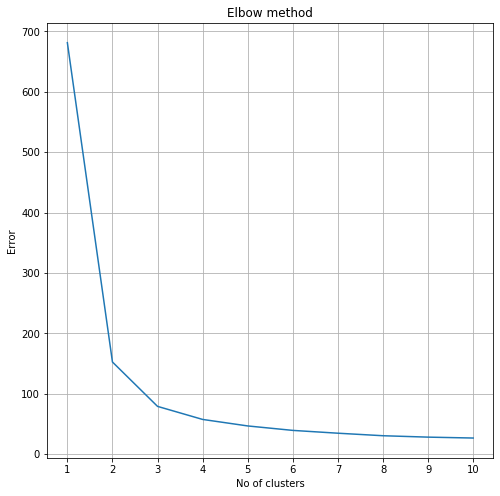

In [3]:
Error =[]

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
    
plt.subplots(figsize=(8,8))
plt.plot(range(1, 11), Error)
plt.xticks(range(1, 11))
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.grid()

In [4]:
# optimal value of k is between 2 and 4, as the elbow-like shape is formed at k=3
kmeans = KMeans(n_clusters=3)

<h5>Training and Tests</h5>

In [5]:
# Fit with training data
kmeans.fit(x_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
# Test predictions
y_pred = kmeans.predict(x_test)

<h5>Evalutation Metrics</h5>

Text(0.5, 1.0, 'Predicted')

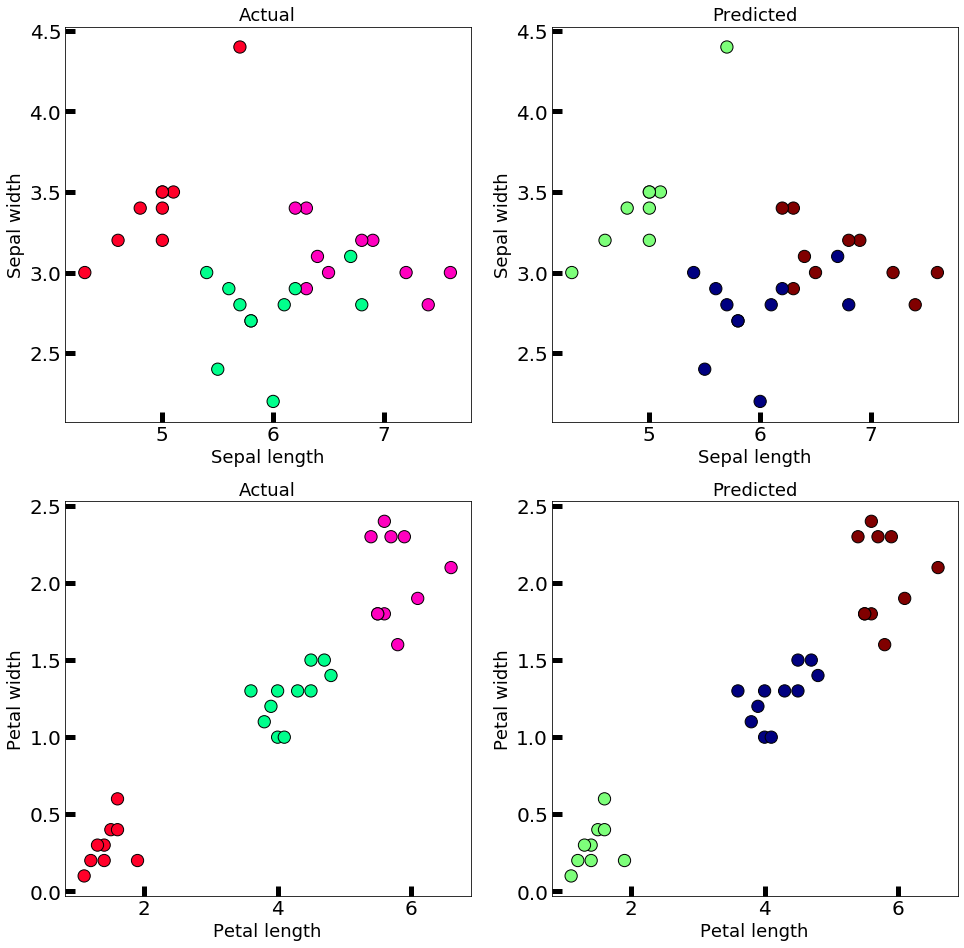

In [7]:
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(2, 2, figsize=(16,16))

axes[0][0].scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap='gist_rainbow', edgecolor='k', s=150)
axes[0][1].scatter(x_test[:, 0], x_test[:, 1], c=y_pred, cmap='jet', edgecolor='k', s=150)
axes[0][0].set_xlabel('Sepal length', fontsize=18)
axes[0][0].set_ylabel('Sepal width', fontsize=18)
axes[0][1].set_xlabel('Sepal length', fontsize=18)
axes[0][1].set_ylabel('Sepal width', fontsize=18)
axes[0][0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0][1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0][0].set_title('Actual', fontsize=18)
axes[0][1].set_title('Predicted', fontsize=18)

axes[1][0].scatter(x_test[:, 2], x_test[:, 3], c=y_test, cmap='gist_rainbow', edgecolor='k', s=150)
axes[1][1].scatter(x_test[:, 2], x_test[:, 3], c=y_pred, cmap='jet', edgecolor='k', s=150)
axes[1][0].set_xlabel('Petal length', fontsize=18)
axes[1][0].set_ylabel('Petal width', fontsize=18)
axes[1][1].set_xlabel('Petal length', fontsize=18)
axes[1][1].set_ylabel('Petal width', fontsize=18)
axes[1][0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1][1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1][0].set_title('Actual', fontsize=18)
axes[1][1].set_title('Predicted', fontsize=18)

In [8]:
# Match clusters (from k means) with labels (from dataset)

labels = np.zeros_like(y_pred)

for i in range(kmeans.n_clusters):
    mask = (y_pred == i)
    labels[mask] = mode(y_test[mask])[0]


In [9]:
print("|....................Confusion Matrix....................|") 
print(tabulate(np.column_stack((iris.target_names, confusion_matrix(y_test, labels))), headers=iris.target_names))

|....................Confusion Matrix....................|
              setosa    versicolor    virginica
----------  --------  ------------  -----------
setosa             9             0            0
versicolor         0            11            0
virginica          0             0           10


In [10]:
print("|....................Classification Report....................|")
print(classification_report(y_test, labels, target_names=iris.target_names))

|....................Classification Report....................|
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [35]:
print("|....................Accuracy Score....................|")
print(accuracy_score(y_test, labels))

|....................Accuracy Score....................|
1.0
